<a href="https://colab.research.google.com/github/andanil/Z-RNA-prediction-tool/blob/main/RNA_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Install dependecies and necessary files

In [ ]:
! pip install pysam
! pip install -q condacolab

In [ ]:
import condacolab
condacolab.install()

In [ ]:
! conda install -y -c bioconda viennarna

In [ ]:
! wget http://hgdownload.soe.ucsc.edu/goldenPath/hg38/bigZips/hg38.fa.gz
! gzip -d hg38.fa.gz

In [ ]:
! git clone https://github.com/andanil/Z-RNA-prediction-tool.git

In [10]:
from google.colab import files

import pysam
import pandas as pd

import sys
sys.path.insert(0, "/content/Z-RNA-prediction-tool")

In [2]:
from src.config import ZHUNT_FILE

! chmod 777 {ZHUNT_FILE}

In [3]:
genome = pysam.FastaFile('hg38.fa')

In [4]:
from src.rna_struct_analyser import get_structs_around_snp, get_structs_around_edited_snp
from src.utils import from_chrom_to_seq_coord
from src.rna.plot_rna import plot_rna, save_image

## Visualization
Get and plot RNA secondary structure near SNP and ROI (in an examples below ROI are Z-DNA regions)

In [5]:
# user can input multiple windows
windows = [[30,30], [50, 50]]
chrom = 'chr11'
# position of SNP
pos = 320394
zdna = [320391, 320397]

# build RNA secondary structures
rna_structs = get_structs_around_snp(genome, chrom, pos, windows)

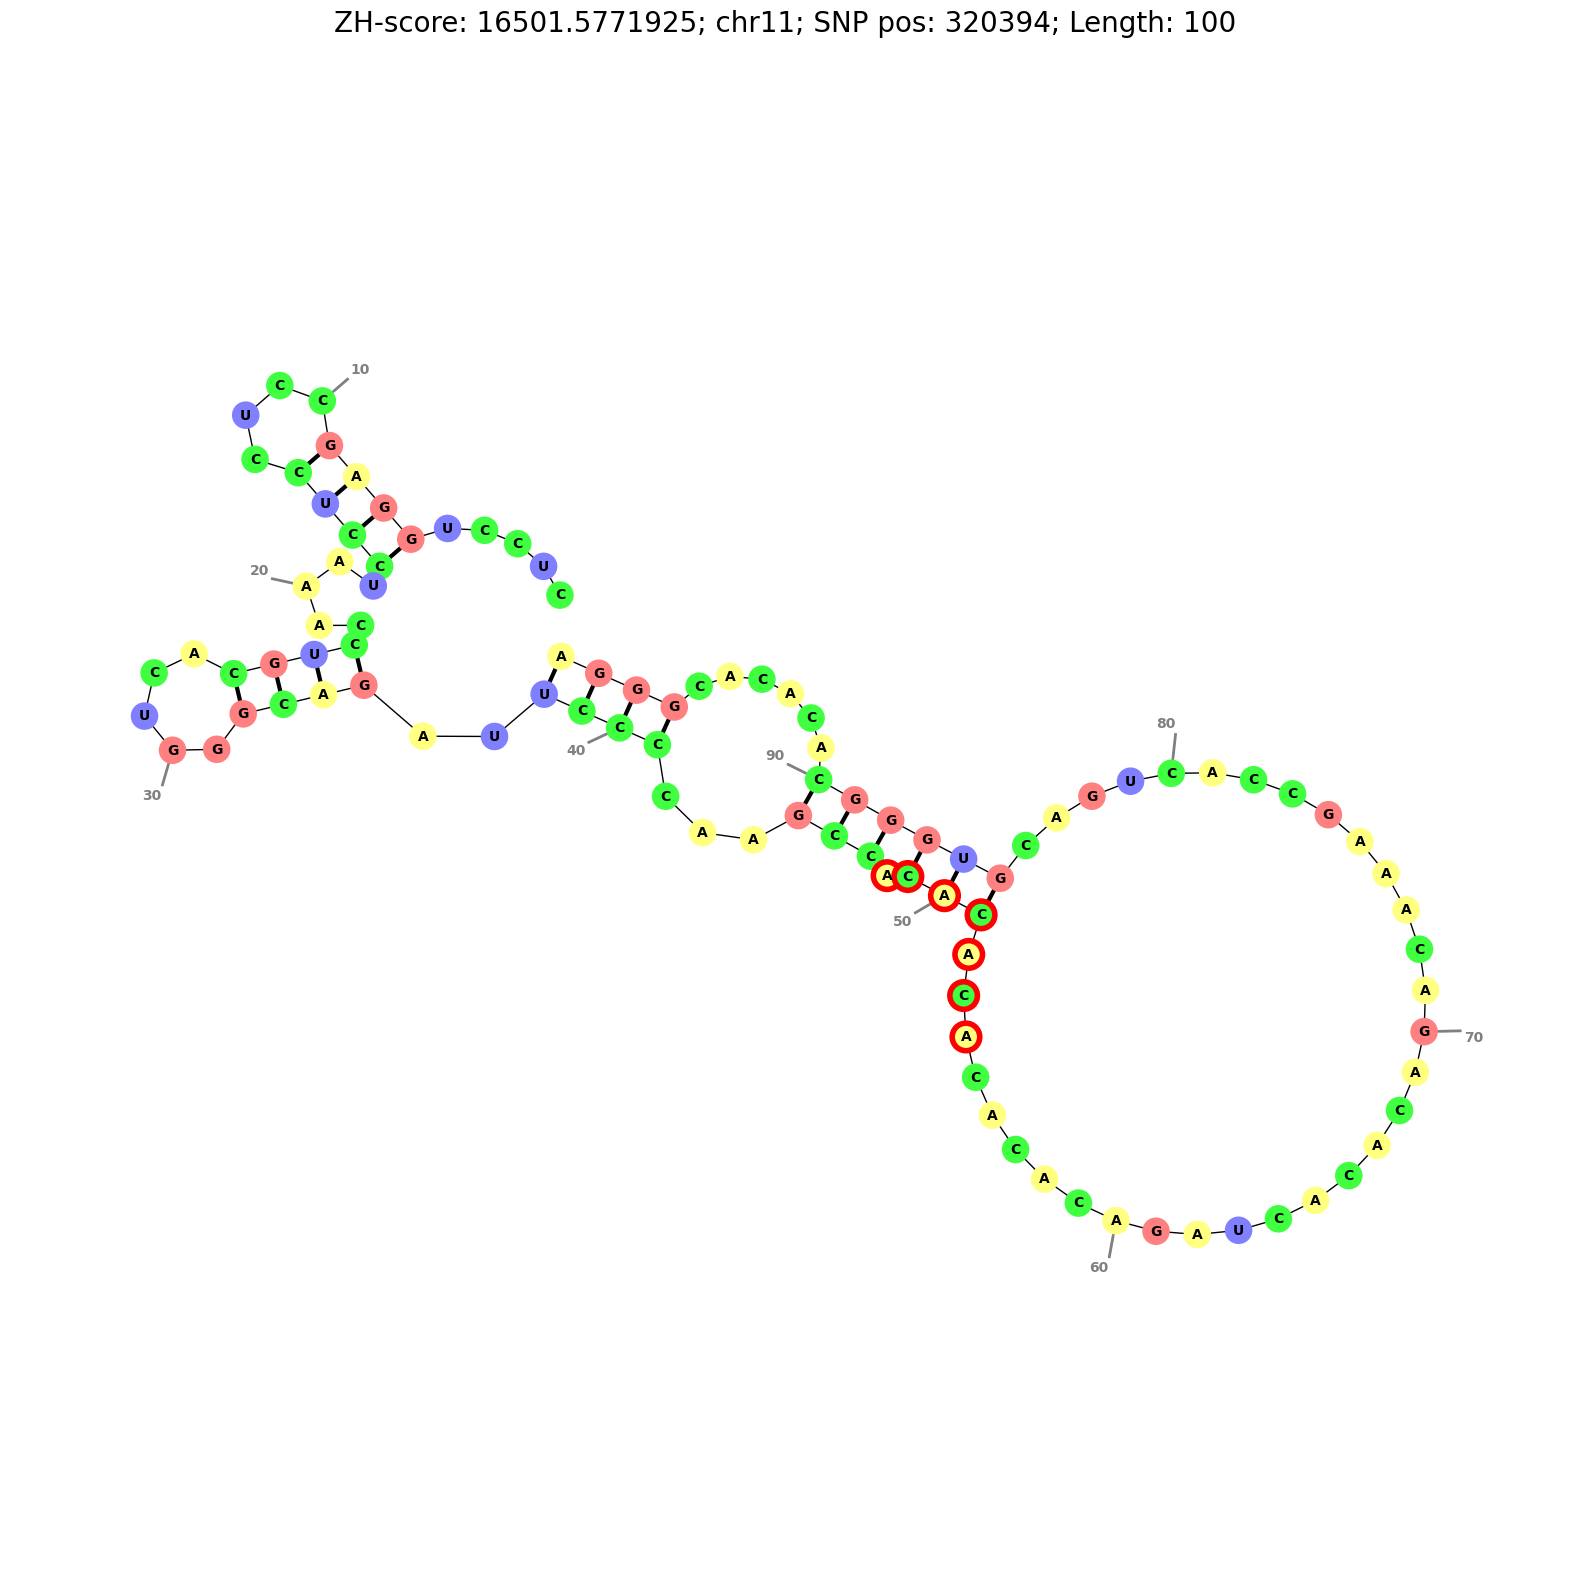

In [6]:
# plot single struct
rna_struct = rna_structs[0]
plot_rna(rna_struct, snp_pos=rna_struct.snp_pos, title=f"ZH-score: {rna_struct.zh_score}; {chrom}; SNP pos: {pos}; Length: {len(rna_struct)}",
        zdna_coord=from_chrom_to_seq_coord(zdna, pos, rna_struct.snp_pos, len(rna_struct)));

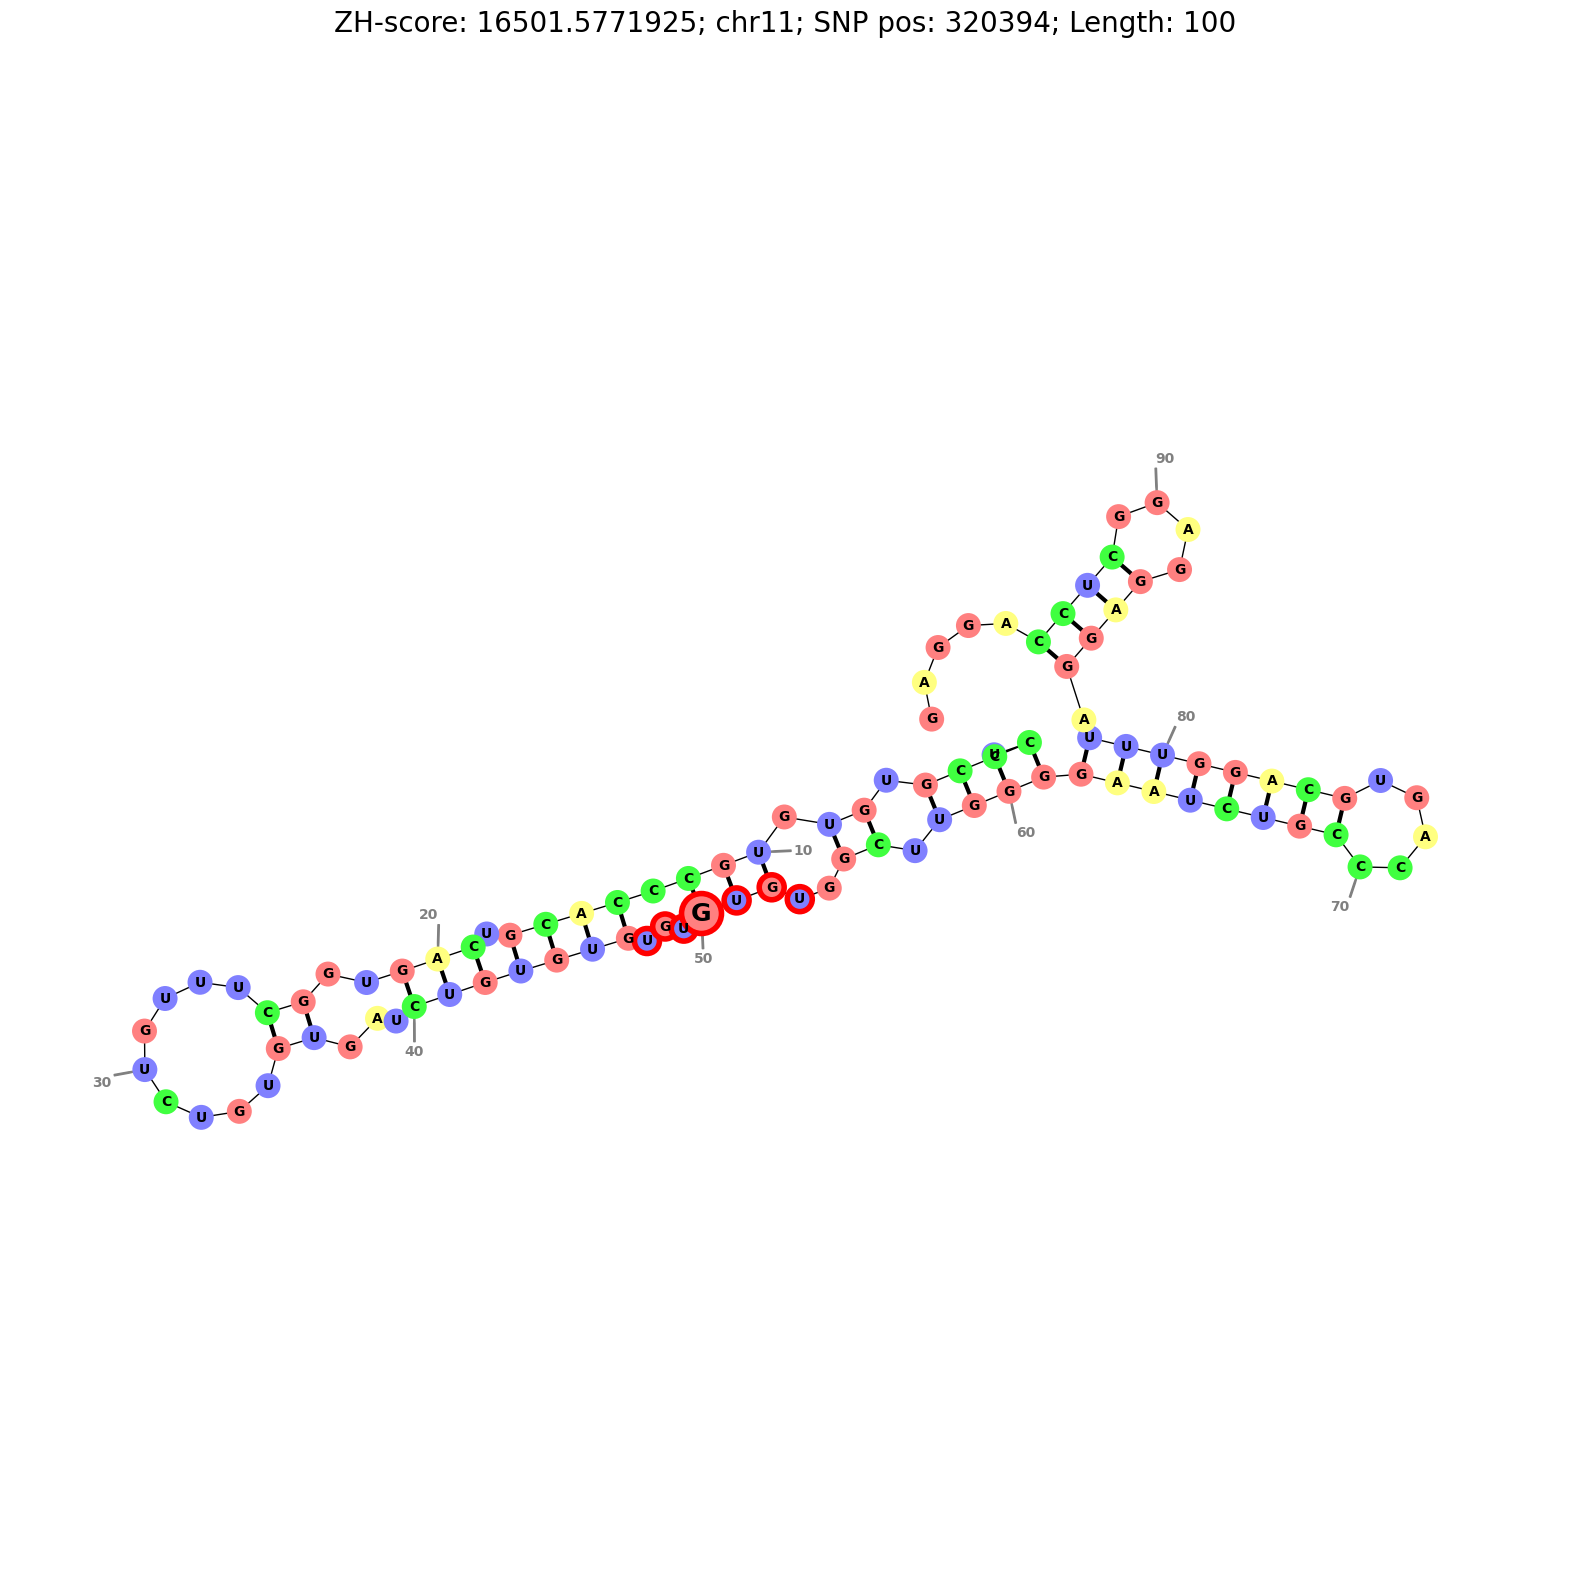

In [7]:
# plot RNA secondary structure for minus strand
plot_rna(rna_struct, snp_pos=rna_struct.snp_pos, title=f"ZH-score: {rna_struct.zh_score}; {chrom}; SNP pos: {pos}; Length: {len(rna_struct)}",
        zdna_coord=from_chrom_to_seq_coord(zdna, pos, rna_struct.snp_pos, len(rna_struct)), forward=False);

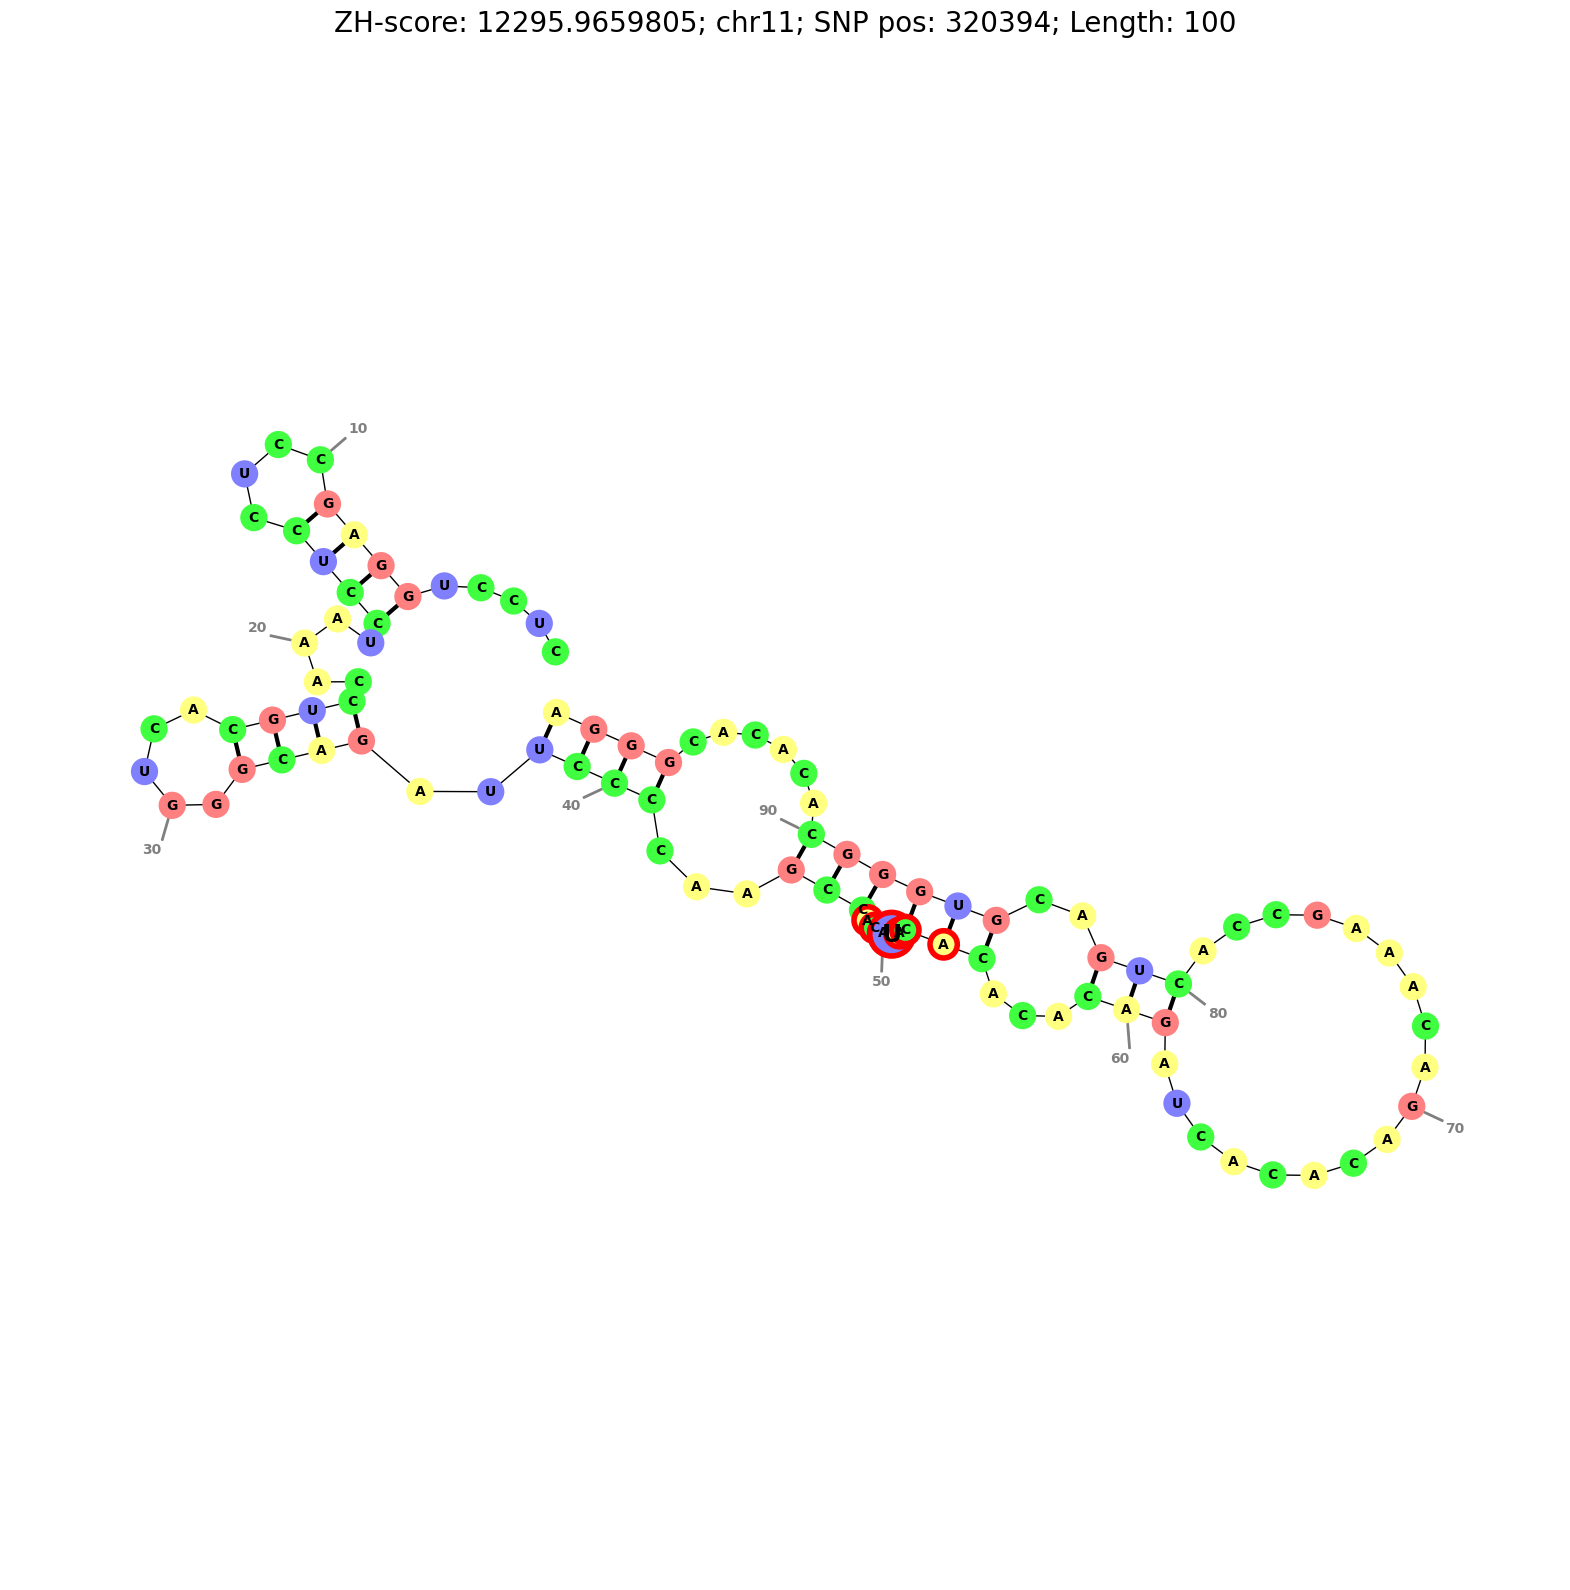

In [8]:
# plot RNA secondary structure for edited sequence
rna_structs = get_structs_around_edited_snp(genome, chrom, pos, 'T', windows)

rna_struct = rna_structs[0]
plot_rna(rna_struct, snp_pos=rna_struct.snp_pos, title=f"ZH-score: {rna_struct.zh_score}; {chrom}; SNP pos: {pos}; Length: {len(rna_struct)}",
        zdna_coord=from_chrom_to_seq_coord(zdna, pos, rna_struct.snp_pos, len(rna_struct)));

In [9]:
# plot all structures and save to pdf
for struct in rna_structs:
    plot_rna(struct, snp_pos=rna_struct.snp_pos, title=f"ZH-score: {struct.zh_score}; {chrom}; SNP pos: {pos}; Length: {len(struct)}",
        zdna_coord=from_chrom_to_seq_coord(zdna, pos, struct.snp_pos, len(struct)))

save_image(f"{chrom} pos_{pos}.pdf")

In [11]:
# download file locally
files.download(f"{chrom} pos_{pos}.pdf")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Read data from file and visualize it

In [ ]:
# upload your own data
uploaded = files.upload()
filename = list(uploaded.keys())[0]


In [ ]:
# OR use file from examples
filename = '/content/Z-RNA-prediction-tool/examples/example.tsv'

In [20]:
data = pd.read_csv(filename, sep='\t')
data = data[['chr', 'pos', 'ZDNABERT start', 'ZDNABERT end']]

In [21]:
data.head()

,chr,pos,ZDNABERT start,ZDNABERT end
0,chr1,1330080,1330067,1330097
1,chr1,1674848,1674826,1674848
2,chr1,1755519,1755509,1755528
3,chr1,2189679,2189665,2189680
4,chr1,2567829,2567823,2567837


In [22]:
windows = [[50, 50], [150, 150], [250, 250]]
for i, row in data.iterrows():
    rna_structs = get_structs_around_snp(genome, row['chr'], row['pos'], windows)
    for struct in rna_structs:
        plot_rna(struct,
                 snp_pos=struct.snp_pos,
                 title=f"Z-score: {struct.zh_score}; {row['chr']}; SNP pos: {row['pos']}; Length: {len(struct)}",
                 zdna_coord=from_chrom_to_seq_coord([row['ZDNABERT start'], row['ZDNABERT end']],
                                                    row['pos'],
                                                    struct.snp_pos,
                                                    len(struct)),
                )

save_image("examples.pdf")

In [ ]:
# download file locally
files.download("examples.pdf")